In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

sns.set_style('whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

sns.set_palette('colorblind')


In [2]:
import os

In [3]:
# WARNING: Execute this cell only once !
os.chdir('../')

In [5]:
from experiments.configs import *

In [6]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Results of the $X$ sampling study

In [59]:
results_path = f"{os.getcwd()}/results/grid_n_points_Y_lasso_no_norm"
print(results_path)
df = utils_exp.get_ex_results(results_path)

/Users/fermanian/Documents/Post doc/Linus/SigLasso/results/grid_n_points_Y_lasso_no_norm


In [60]:
print(df.head())

   best_sig_lasso                                          data_path  \
1             3.0  /Users/fermanian/Documents/Post doc/Linus/SigL...   
2             2.0  /Users/fermanian/Documents/Post doc/Linus/SigL...   
3             2.0  /Users/fermanian/Documents/Post doc/Linus/SigL...   
4             1.0  /Users/fermanian/Documents/Post doc/Linus/SigL...   
5             1.0  /Users/fermanian/Documents/Post doc/Linus/SigL...   

   l2_test_lasso  l2_train_lasso  lasso_best_alpha  \
1       0.247207        0.262736          0.007152   
2       0.442664        0.413435          0.007754   
3       0.475814        0.435482          0.004422   
4       0.297922        0.292515          0.001049   
5       0.361203        0.406483          0.017814   

                                   model_hyperparams model_names  \
1  {'gru': {'gru_width': 128, 'lr': 0.001, 'num_e...   ['lasso']   
2  {'gru': {'gru_width': 128, 'lr': 0.001, 'num_e...   ['lasso']   
3  {'gru': {'gru_width': 128, 'lr': 0.

In [61]:
df['n_points_Y'] = df['n_points_Y'].astype(int)

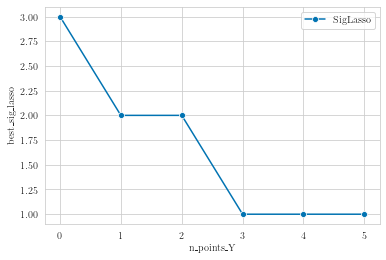

In [62]:
ax = sns.lineplot(x='n_points_Y', y='best_sig_lasso', data=df, label='SigLasso', marker='o')

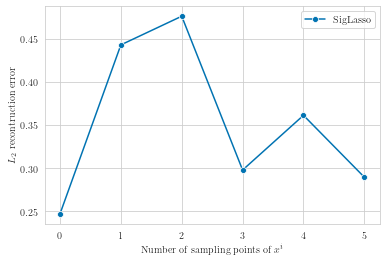

In [63]:
ax = sns.lineplot(x='n_points_Y', y='l2_test_lasso', data=df, label='SigLasso', marker='o')
# sns.lineplot(x='n_points_Y', y='l2_train_gru', data=df, label='GRU', linestyle='-.', marker='D')
# sns.lineplot(x='n_points_Y', y='l2_train_ncde', data=df, label='Neural CDE', linestyle='--', marker='s')
ax.set(xlabel = r'Number of sampling points of $x^{i}$', ylabel=r'$L_2$ recontruction error')
# ax.set_yscale('log')
plt.legend()
# plt.savefig('figures/sampling_study_l2.pdf', bbox_inches='tight')
plt.show()

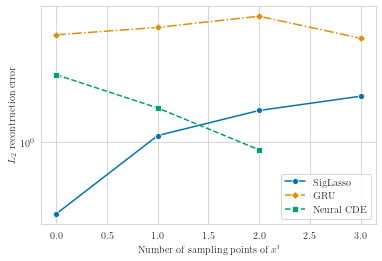

In [29]:
ax = sns.lineplot(x='n_points_Y', y='l2_test_lasso', data=df, label='SigLasso', marker='o')
sns.lineplot(x='n_points_Y', y='l2_test_gru', data=df, label='GRU', linestyle='-.', marker='D')
sns.lineplot(x='n_points_Y', y='l2_test_ncde', data=df, label='Neural CDE', linestyle='--', marker='s')
ax.set(xlabel = r'Number of sampling points of $x^{i}$', ylabel=r'$L_2$ recontruction error')
ax.set_yscale('log')
plt.legend()
# plt.savefig('figures/sampling_study_l2.pdf', bbox_inches='tight')
plt.show()

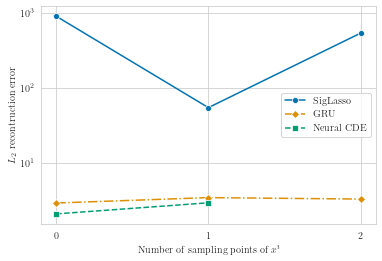

In [10]:
ax = sns.lineplot(x='n_points_Y', y='l2_train_lasso', data=df, label='SigLasso', marker='o')
sns.lineplot(x='n_points_Y', y='l2_train_gru', data=df, label='GRU', linestyle='-.', marker='D')
sns.lineplot(x='n_points_Y', y='l2_train_ncde', data=df, label='Neural CDE', linestyle='--', marker='s')
ax.set(xlabel = r'Number of sampling points of $x^{i}$', ylabel=r'$L_2$ recontruction error')
ax.set_yscale('log')
plt.legend()
# plt.savefig('figures/sampling_study_l2.pdf', bbox_inches='tight')
plt.show()

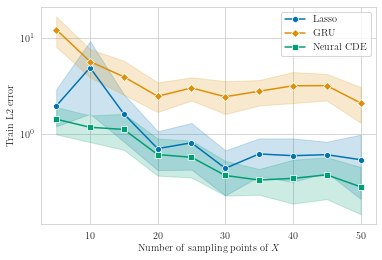

In [12]:
ax = sns.lineplot(x='n_points', y='mse_train_lasso', data=df, label='Lasso', marker='o')
sns.lineplot(x='n_points', y='mse_train_gru', data=df, label='GRU',marker='D')
sns.lineplot(x='n_points', y='mse_train_ncde', data=df, label='Neural CDE',marker='s')
ax.set(xlabel = r'Number of sampling points of $X$', ylabel='Train L2 error')
ax.set_yscale('log')
plt.legend()
plt.savefig('figures/sampling_study_mise.pdf', bbox_inches='tight')
plt.show()

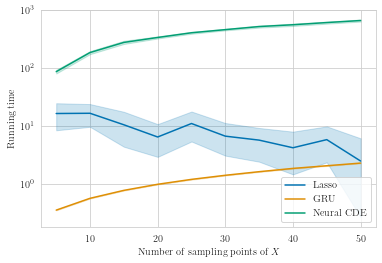

In [13]:
ax = sns.lineplot(x='n_points', y='time_lasso', data=df, label='Lasso')
sns.lineplot(x='n_points', y='time_gru', data=df, label='GRU')
sns.lineplot(x='n_points', y='time_ncde', data=df, label='Neural CDE')
ax.set_yscale('log')
ax.set(xlabel = r'Number of sampling points of $X$', ylabel='Running time')
plt.legend()
plt.savefig('figures/sampling_study_time.pdf', bbox_inches='tight')
plt.show()

In [14]:
df_30 = df[df['n_points']==30]
print(df_30[['time_lasso', 'time_ncde', 'time_gru']].mean())

time_lasso      6.701767
time_ncde     457.282456
time_gru        1.420324
dtype: float64


In [15]:
457/6

76.16666666666667